In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart_disease_uci.csv")
data.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
age,63,67,67,37,41
sex,Male,Male,Male,Male,Female
dataset,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland
cp,typical angina,asymptomatic,asymptomatic,non-anginal,atypical angina
trestbps,145.0,160.0,120.0,130.0,130.0
chol,233.0,286.0,229.0,250.0,204.0
fbs,True,False,False,False,False
restecg,lv hypertrophy,lv hypertrophy,lv hypertrophy,normal,lv hypertrophy
thalch,150.0,108.0,129.0,187.0,172.0


In [3]:
data.shape


(920, 16)

In [4]:
data.dtypes

id                   int64
age                  int64
sex                 object
dataset             object
cp                  object
trestbps           float64
chol               float64
fbs                 object
restecg             object
thalch             float64
exang               object
oldpeak            float64
slope               object
ca                 float64
thal                object
disease_present      int64
dtype: object

In [5]:
data.drop(['id', 'dataset'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              920 non-null    int64  
 1   sex              920 non-null    object 
 2   cp               920 non-null    object 
 3   trestbps         861 non-null    float64
 4   chol             890 non-null    float64
 5   fbs              830 non-null    object 
 6   restecg          918 non-null    object 
 7   thalch           865 non-null    float64
 8   exang            865 non-null    object 
 9   oldpeak          858 non-null    float64
 10  slope            611 non-null    object 
 11  ca               309 non-null    float64
 12  thal             434 non-null    object 
 13  disease_present  920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [6]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,disease_present
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
data.thal.value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [8]:
data.loc[data['thal']==0, 'thal'] = np.NaN

In [9]:
data.thal.unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [10]:
data.ca.value_counts()

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [11]:
data_null = pd.DataFrame(data.isnull().sum().reset_index())
data_null.columns = ['feature', 'null_values']
data_null

,feature,null_values
0,age,0
1,sex,0
2,cp,0
3,trestbps,59
4,chol,30
5,fbs,90
6,restecg,2
7,thalch,55
8,exang,55
9,oldpeak,62


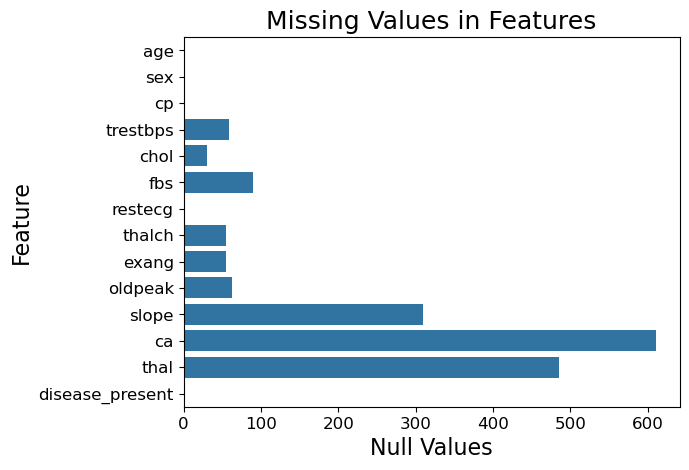

In [12]:
sns.barplot(y=data_null['feature'], x=data_null['null_values'], orient='h')
plt.title('Missing Values in Features', fontsize=18)
plt.xlabel('Null Values', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
#for categorical features, replacing null values using backfill method
data = data.sample(frac = 1, random_state = 0)

data['fbs']= data['fbs'].fillna(data['fbs'].mode()[0])
data['restecg']= data['restecg'].fillna(data['restecg'].mode()[0])
data['exang']= data['exang'].fillna(data['exang'].mode()[0])
data['slope']= data['slope'].fillna(data['slope'].mode()[0])
data['thal']= data['thal'].fillna(data['thal'].mode()[0])

data.isnull().sum()

C:\Users\MANASWITA GHOSE\AppData\Local\Temp\ipykernel_21428\226993999.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fbs']= data['fbs'].fillna(data['fbs'].mode()[0])
C:\Users\MANASWITA GHOSE\AppData\Local\Temp\ipykernel_21428\226993999.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['exang']= data['exang'].fillna(data['exang'].mode()[0])


age                0
sex                0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalch             0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
disease_present    0
dtype: int64

C:\Users\MANASWITA GHOSE\AppData\Local\Temp\ipykernel_21428\2996785487.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\MANASWITA GHOSE\AppData\Local\Temp\ipykernel_21428\2996785487.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\MANASWITA GHOSE\App

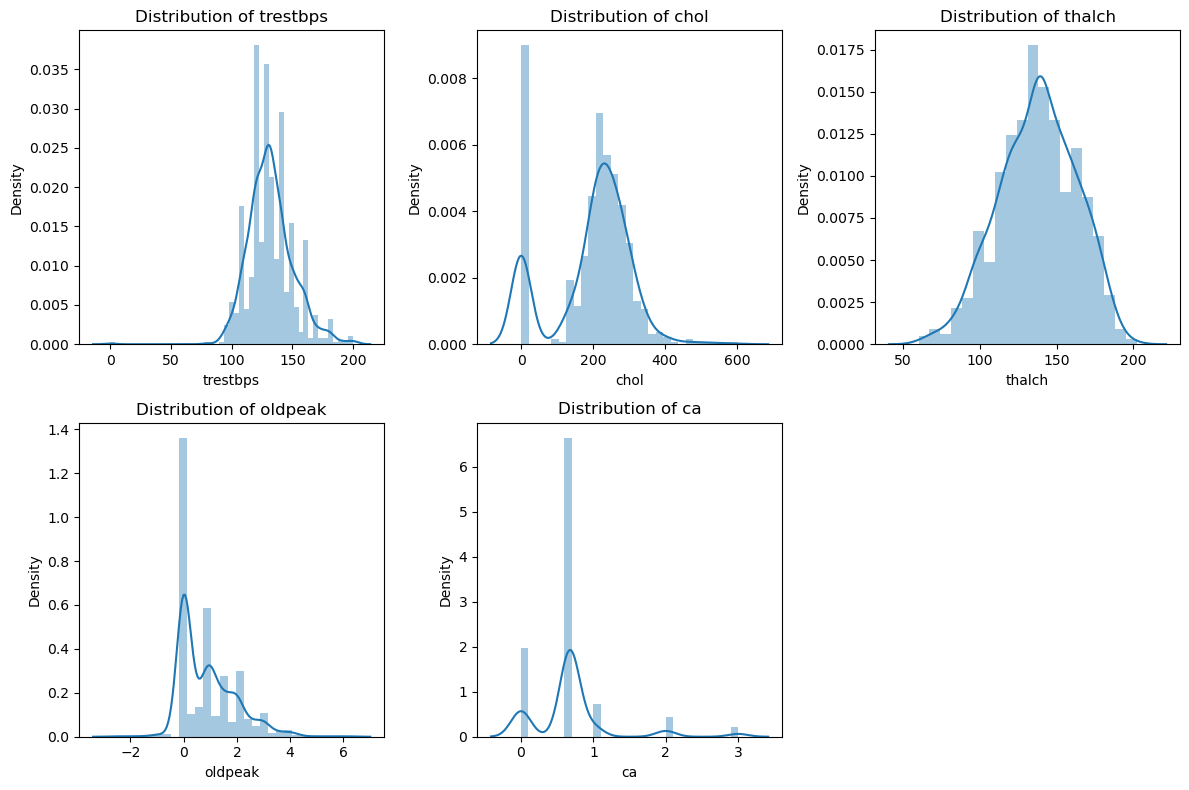

In [21]:
cols = ['trestbps', 'chol', 'thalch','oldpeak', 'ca']
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.distplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


In [22]:
data['thalch'] = data['thalch'].fillna(data['thalch'].mean())
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].mean())
data['trestbps'] = data['trestbps'].fillna(data['trestbps'].mean())
data['chol'] = data['chol'].fillna(data['trestbps'].mean())
data['ca'] = data['ca'].fillna(data['ca'].mean())
data.isnull().sum()

age                0
sex                0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalch             0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
disease_present    0
dtype: int64

Text(0.5, 1.0, 'Box Plot of Health Variables')

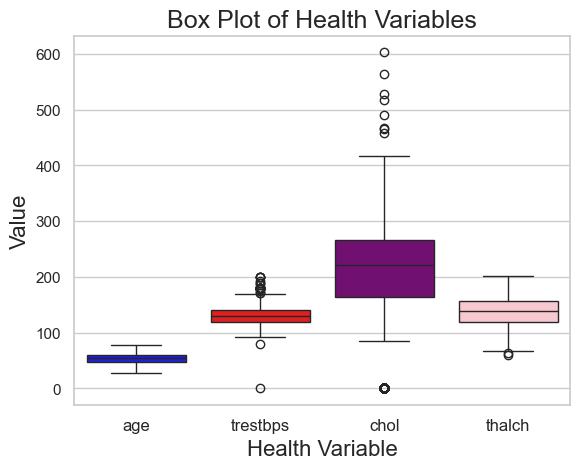

In [25]:
health_variables = ['age', 'trestbps', 'chol', 'thalch']
colors = ['blue', 'red', 'purple', 'pink']

sns.set(style="whitegrid")
ax = sns.boxplot(data=data[health_variables], palette=colors)

# Set x-axis ticks and labels with rotation
ax.set_xticks(range(len(health_variables)))
ax.set_xticklabels(health_variables, fontsize=12)

# Set labels and title
ax.set_xlabel('Health Variable', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax.set_title('Box Plot of Health Variables', fontsize=18)


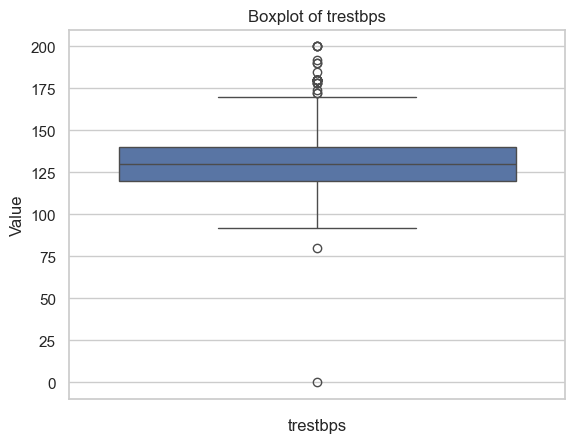

In [26]:
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'thalch']
feature = 'trestbps'
sns.boxplot( y=data[feature] );
plt.xlabel(feature)
plt.ylabel('Value')
plt.title('Boxplot of {}'.format(feature))
plt.show()

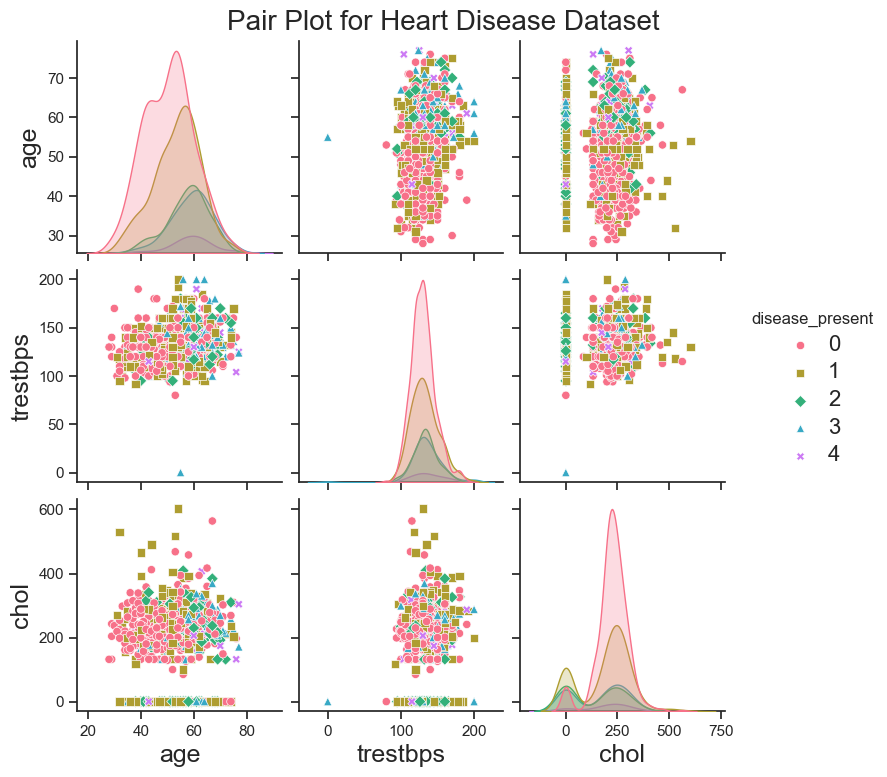

In [29]:
#pairplot
# Select specific columns
selected_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'disease_present']

# Create a copy of the subset
df_subset = data[selected_columns].copy()

# Convert categorical variables to appropriate data types
df_subset['sex'] = df_subset['sex'].astype('category')
df_subset['cp'] = df_subset['cp'].astype('category')
df_subset['disease_present'] = df_subset['disease_present'].astype('category')

# Create a pair plot for multivariate EDA
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df_subset, hue='disease_present', palette='husl', markers=["o", "s", "D", "^", "X"])

# Add a title to the pair plot
pair_plot.fig.suptitle("Pair Plot for Heart Disease Dataset", y=1.02, fontsize=20)

legend = pair_plot._legend
for text in legend.get_texts():
    text.set_fontsize(16)

# Loop through each subplot to set x and y labels
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)  # Increase x-axis label font size
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)  # Increase y-axis label font size

# Show the plot
plt.show()
     

In [35]:
#label encoding for categorical features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['cp'] = label_encoder.fit_transform(data['cp'])
data['restecg'] = label_encoder.fit_transform(data['restecg'])
data['slope'] = label_encoder.fit_transform(data['slope'])
data['thal'] = label_encoder.fit_transform(data['thal'])
data['fbs'] = label_encoder.fit_transform(data['fbs'])
data['exang'] = label_encoder.fit_transform(data['exang'])


data['sex'] = data['sex'].replace(('Male', 'Female'), (1, 0))
data = data.infer_objects()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,disease_present
741,64,1,0,120.0,0.0,1,2,106.0,0,2.0,1,0.676375,1,1
349,41,0,1,125.0,184.0,0,1,180.0,0,0.0,1,0.676375,1,0
241,41,0,1,126.0,306.0,0,1,163.0,0,0.0,2,0.000000,1,0
107,57,1,2,128.0,229.0,0,0,150.0,0,0.4,1,1.000000,2,1
727,60,1,2,180.0,0.0,0,2,140.0,1,1.5,1,0.676375,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,52,1,0,130.0,298.0,0,1,110.0,1,1.0,1,0.676375,1,1
422,51,0,2,150.0,200.0,0,1,120.0,0,0.5,2,0.676375,1,0
898,58,1,0,160.0,256.0,1,0,113.0,1,1.0,2,0.676375,1,3
612,43,1,0,115.0,0.0,0,1,145.0,1,2.0,1,0.676375,2,4


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

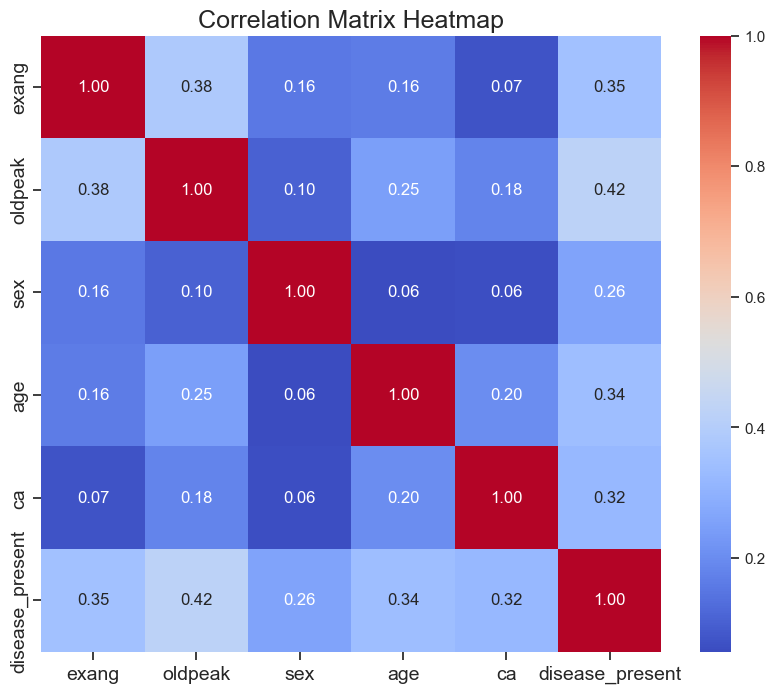

In [39]:
#============================ Correlation Matrix Heatmap ============================#
features_analysis=['exang', 'oldpeak', 'sex', 'age', 'ca', 'disease_present']

for i in features_analysis:
    data[i] = pd.to_numeric(data[i], errors='coerce')

subset_data = data[features_analysis]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [41]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        70
           1       0.57      0.55      0.56        66
           2       0.30      0.13      0.18        23
           3       0.36      0.25      0.29        20
           4       0.00      0.00      0.00         5

    accuracy                           0.58       184
   macro avg       0.38      0.37      0.36       184
weighted avg       0.53      0.58      0.54       184

Metrics for Test Set:
Accuracy: 0.5380434782608695


C:\Users\MANASWITA GHOSE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MANASWITA GHOSE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MANASWITA GHOSE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M

Text(92.25, 0.5, 'Predicted')

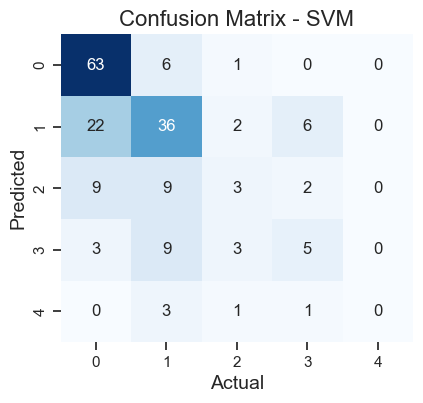

In [43]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

precision_test = precision_score(y_test, y_pred, average='weighted')  # weighted by support
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')

print('Metrics for Test Set:')
print('Accuracy: {}'.format((cm_test[0][0] + cm_test[1][1]) / len(y_test)))

# Plot Confusion Matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM', fontsize = 16)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)

In [44]:

# ROC Curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve of test set
precision, recall, thresholds = precision_recall_curve(y_test, classifier.decision_function(X_test))
area_under_curve = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(area_under_curve))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

ValueError: multiclass format is not supported